In [2]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from functions import ldrc
from functions import reconstruction as r
from functions import visualization as v
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

Loading BokehJS ...

High-order cumulants or moments reconstructions result-in images with a large dynamic range of pixel intensities. This ldrc algorithm compresses the dynamic range of these reconstructions with respect to a reference image (mask) while retaining resolution enhancement.The compression is performed locally in a small window that is scanned across the image. For details of the ldrc method, see [ref, Appendix 4](https://www.biorxiv.org/content/10.1101/500819v3.supplementary-material?versioned=true). We can pass the reference image, input image, order of moments- / cumulants-reconstructd image and scanning window size to the function <code>ldrc(mask_im, input_im, order, window_size)</code>.

## Example: Moments-reconstructed images

### Step 1: Calculate moments reconstructions

Here we calculate the sixth-order moments reconstruction as the input image, and the average image as the reference image. We can plot reconstructions using either <code>matplotlib.pyplot.imshow</code> or <code>v.bokeh_visualization_mult</code>.

In [8]:
filepath = '../SampleData'
filename = 'Block1.tif'

m6 = r.calc_moment_im(filepath, filename, order=6,frames=[0,50])
#mean = r.average_image(filepath, filename)

[==============================] 100.0%

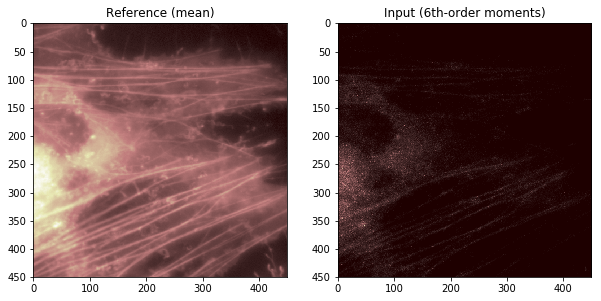

In [24]:
# Plot mean and m6 with imshow
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Reference (mean)')
axs[0].imshow(mean, cmap='pink')

axs[1].set_title('Input (6th-order moments)')
axs[1].imshow(m6, cmap='pink')
plt.show()

In [25]:
# Plot mean and m6 in Bokeh with hover tool and save the image as html file.
v.bokeh_visualization_mult([mean, m6], 
                           ['Reference (mean)', 'Input (6th-order moments)'], 
                           save_option = True,
                           filename='Comparison of mean and m6')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


As we can see from images above, the pixel values in m6 are much larger comparing to mean image, while due to the dynamic range issue, m6 appears to be dimmer and some detailos are lost.

### Step 2: Local Dynamic Range Compression (LDRC)

Please refer to the [documentaion](https://github.com/xiyuyi/pysofi/blob/master/functions/ldrc.py) for details of each parameter for <code>ldrc.ldrc</code>. Window size is empirical and can be changed based on data. Here we try out different values for the window size, and choose one that yields better result.

In [30]:
ldrc_im = ldrc.ldrc(mask_im=mean, input_im=m6, order=6, window_size=[25, 25])

[====================] 100%

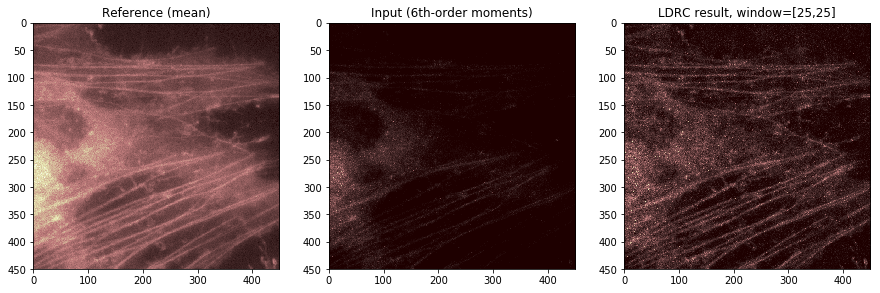

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Reference (mean)')
axs[0].imshow(m2, cmap='pink')

axs[1].set_title('Input (6th-order moments)')
axs[1].imshow(m6, cmap='pink')

axs[2].set_title('LDRC result, window=[25,25]')
axs[2].imshow(ldrc_im, cmap='pink')
plt.show()

In [38]:
v.bokeh_visualization_mult([mean, m6, ldrc_im], 
                           ['Reference (mean)', 'Input (6th-order moments)', 'LDRC result, window=[25,25]'], 
                           save_option = True,
                           filename='LDRC result')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[====================] 100%

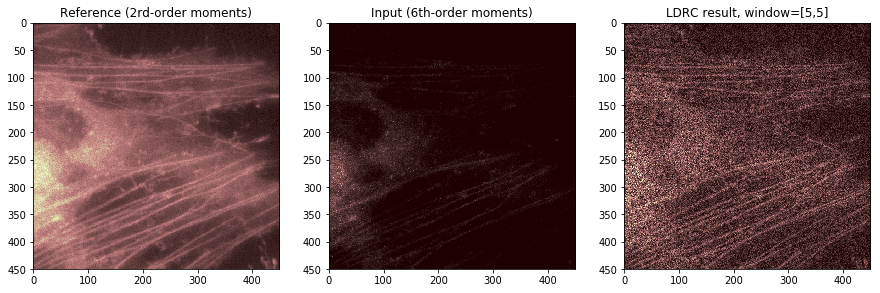

In [28]:
ldrc_im = ldrc.ldrc(mask_im=mean, input_im=m6, order=6, window_size=[5, 5])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Reference (mean)')
axs[0].imshow(m2, cmap='pink')

axs[1].set_title('Input (6th-order moments)')
axs[1].imshow(m6, cmap='pink')

axs[2].set_title('LDRC result, window=[5,5]')
axs[2].imshow(ldrc_im, cmap='pink')
plt.show()

[====================] 100%

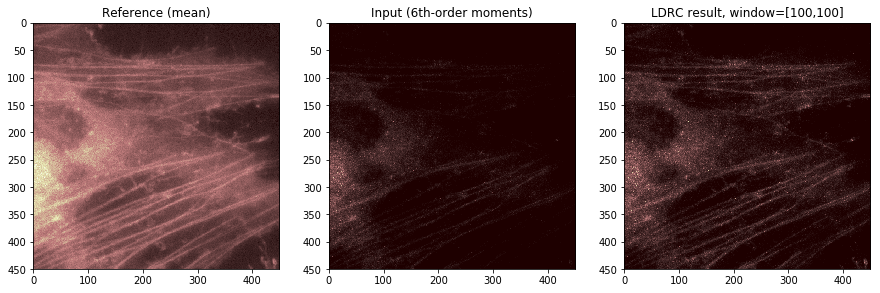

In [33]:
ldrc_im = ldrc.ldrc(mask_im=mean, input_im=m6, order=6, window_size=[100, 100])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Reference (mean)')
axs[0].imshow(m2, cmap='pink')

axs[1].set_title('Input (6th-order moments)')
axs[1].imshow(m6, cmap='pink')

axs[2].set_title('LDRC result, window=[100,100]')
axs[2].imshow(ldrc_im, cmap='pink')
plt.show()

[====================] 100%

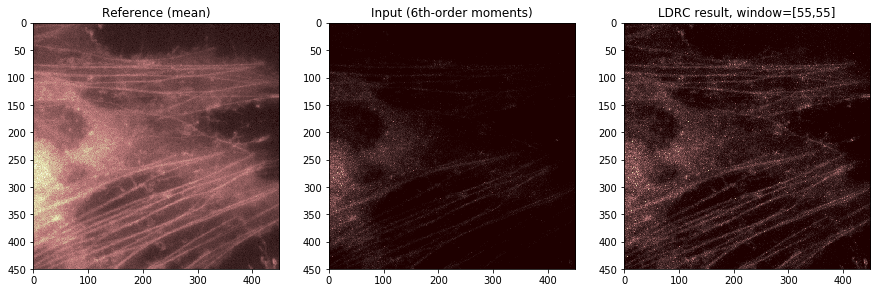

In [22]:
ldrc_im = ldrc.ldrc(mask_im=mean, input_im=m6, order=6, window_size=[55, 55])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Reference (mean)')
axs[0].imshow(m2, cmap='pink')

axs[1].set_title('Input (6th-order moments)')
axs[1].imshow(m6, cmap='pink')

axs[2].set_title('LDRC result, window=[55,55]')
axs[2].imshow(ldrc_im, cmap='pink')
plt.show()

From images shown above, we can see that if the window size is too small, the processed image would be very niosy. If the window size is too large, the dynamic range is not compressed enough, thus the processed image is still very dim. Here we find that we get the best result when <code>window_size=[25, 25]</code>.

You can increase the order of moments reconstruction and try out LDRC method yourself. **Note** that in SOFI2.0 pipeline, if you choose to conduct Fourier interpolation as the first step, you need to change the window size accordingly based on the interpolation factor.

### Notes on cumulants-reconstructed images

For cumulants-reconstructed images and moments-reconstructed images with odd orders, there appears pixels with negative values. Since the virtual fluorescence intensity is always positive, the boundaries between the negative
and positive regions yield [cusp-artifacts](https://www.osapublishing.org/boe/abstract.cfm?uri=boe-11-2-554).